In [1]:
import os 
import subprocess
import resource # for timing the subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import six
import time
import math

my_env = os.environ.copy()
my_env['DYLD_LIBRARY_PATH'] = "/Users/jasminexuereb/.opam/4.08.0/lib/z3" 
FNULL = open(os.devnull, 'w') # to hide console output of the subprocess

In [2]:
# initialize list of lists 
# data = [[1, 0.3286395, 0.6484685],[5, 1.940188, 4.663278999999999], [10, 27.780655, 338.726325]] 
data = pd.read_csv("RunningTimes.csv")

# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Complexity', 'Choice', 'Recursion','NestedIFs']) 
df['Complexity'] = df.index+1
df

,Complexity,Choice,Recursion,NestedIFs
0,1,0.057053,0.083777,0.037657
1,2,0.083958,0.135659,0.329082
2,3,0.127290,0.198771,1.266692
3,4,0.157585,0.280958,26.690589
4,5,0.241748,0.443851,1799.737093
5,6,0.310347,0.624908,inf
6,7,0.501757,0.980434,inf
7,8,0.747384,1.556083,inf
8,9,1.302059,2.604190,inf
9,10,2.347422,4.648119,inf


In [3]:
def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

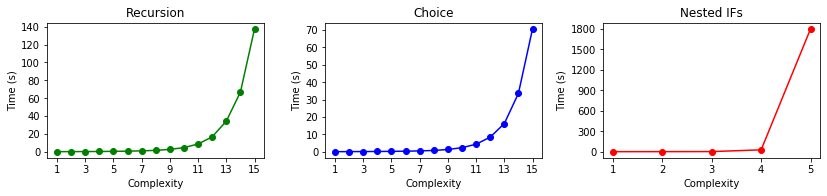

In [21]:
# Creates three subplots and unpacks the output array immediately
# maybe switch to grid
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figheight(3)
f.set_figwidth(12)
f.tight_layout(pad=3.0)

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Recursion"])
ax1.plot(df['Complexity'], df['Recursion'], marker='o', color='g')
ax1.set_title('Recursion')
ax1.set_xlabel("Complexity")
ax1.set_ylabel("Time (s)")
ax1.locator_params(axis='y', nbins=8)
ax1.set_xticks(np.arange(min(df['Complexity']), max(df['Complexity'])+1, 2))

complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Choice"])
ax2.plot(df['Complexity'], df['Choice'], marker='o', color='b')
ax2.set_title('Choice')
ax2.set_xlabel("Complexity")
ax2.set_ylabel("Time (s)")
#specify the number of ticks on both or any single axes
# ax2.locator_params(axis='x', nbins=10)
ax2.set_xticks(np.arange(min(df['Complexity']), max(df['Complexity'])+1, 2))
ax2.locator_params(axis='y', nbins=8)
    
complexity = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["NestedIFs"])
ax3.plot(df['Complexity'], df['NestedIFs'], marker='o', color='r')
ax3.set_title('Nested IFs')
ax3.set_xlabel("Complexity")
ax3.set_ylabel("Time (s)")
ax3.set_xticks(np.arange(min(complexity['Complexity']), max(complexity['Complexity'])+1, 1))
ax3.set_yticks(np.arange(0, roundup(max(complexity['NestedIFs']))+1, (roundup(max(complexity['NestedIFs'])))/6))

f.savefig('Figure.png')